# Essential Functions

In [1]:
# One of the easiest ways to optimize your R code is to ensure it is kept up-to-date.
# You can check which version of R you are running with the command "version."
version
# Note that version is a built-in variable, not a function.
version$major
version$minor

               _                           
platform       x86_64-w64-mingw32          
arch           x86_64                      
os             mingw32                     
system         x86_64, mingw32             
status                                     
major          3                           
minor          6.1                         
year           2019                        
month          07                          
day            05                          
svn rev        76782                       
language       R                           
version.string R version 3.6.1 (2019-07-05)
nickname       Action of the Toes          

[1] "3"

[1] "6.1"

# Benchmarking

Suppose you have existing code, but it doesn't run as quickly as you'd like.  You could get a new machine, or rewrite your code, but you may have to rewrite code in several places.  It may not be clear though whether it would be worth it to take the time to change all this code.  This is where benchmarking comes in.

Benchmarking is the practice of comparing one piece of code to one more or other pieces, and comparig the time it takes each one to run.  With benchmarking, you can compare multiple pieces of code with small datasets, before running the most efficient on the much larger full datasets.

In [2]:
# As an example, consider the following three ways of creating a sequence in R:
# 1. Using a colon operator: 1:n
# 2. Use the sequence function, and use the default step size: seq(1:n)
# 3. Use the sequence function, and explicitly specify the step size: seq(1:n, by=1)
colon <- function(n) 1:n
seq_defualt <- function(n) seq(1, n)
seq_by <- function(n) seq(1, n, by=1)

# Now, to actually time each function, we use the function system.time()
n <- 1e8
system.time(colon(n))
system.time(seq_defualt(n))
system.time(seq_by(n))

# The first two lines show similar results,
# but explicitly defining the step sizes significantly slows down the code.
# Therefore, if we had existing code that used the syntax seq(1, n, by=a),
# It may be worth it to change this code to 1:n to make it more efficient,
# assuming the explitictly-defined step size is 1.
# However, if our existing code used the syntax seq(1, n),
# we do have evidence that changing the code to 1:n would make it more efficient.

   user  system elapsed 
      0       0       0 

   user  system elapsed 
      0       0       0 

   user  system elapsed 
   0.85    0.25    1.09 

The system.time() function returns three numbers: user, system, elapsed.  The rough definitions are:
1. user- CPU time charged for the execution of user instructions.
2. system- CPU time charged for execution by the system on behalf of the calling process.
3. elapsed- Approximately the sum of user and system time.  Typically the number we care about.

In [3]:
# You may time a function, but still want to use the results afterards.
# For example, suppose you time a function that you know will take a long time.
# You may step away, but you want to be able to use the results when you get back.

# In this case, simply assign the results of a function to a variable,
# but do so within system.time()

# WARNING: It is important to use the assignment operator "<-" in these cases,
# as an equals sign "=" inside a function will be read as a passing in an argument to a parameter.
n  <-  1e3
system.time(numbers <- seq(1, n, by=1))
numbers

   user  system elapsed 
      0       0       0 

[1]    1    2    3    4    5    6    7    8    9   10   11   12   13   14
  [15]   15   16   17   18   19   20   21   22   23   24   25   26   27   28
  [29]   29   30   31   32   33   34   35   36   37   38   39   40   41   42
  [43]   43   44   45   46   47   48   49   50   51   52   53   54   55   56
  [57]   57   58   59   60   61   62   63   64   65   66   67   68   69   70
  [71]   71   72   73   74   75   76   77   78   79   80   81   82   83   84
  [85]   85   86   87   88   89   90   91   92   93   94   95   96   97   98
  [99]   99  100  101  102  103  104  105  106  107  108  109  110  111  112
 [113]  113  114  115  116  117  118  119  120  121  122  123  124  125  126
 [127]  127  128  129  130  131  132  133  134  135  136  137  138  139  140
 [141]  141  142  143  144  145  146  147  148  149  150  151  152  153  154
 [155]  155  156  157  158  159  160  161  162  163  164  165  166  167  168
 [169]  169  170  171  172  173  174  175  176  177  178  179  180  181  182
 [183]  183  184  185  186  187  188  189  190  191  192  193  194  195  196
 [197]  197  198  199  200  201  202  203  204  205  206  207  208  209  210
 [211]  211  212  213  214  215  216  217  218  219  220  221  222  223  224
 [225]  225  226  227  228  229  230  231  232  233  234  235  236  237  238
 [239]  239  240  241  242  243  244  245  246  247  248  249  250  251  252
 [253]  253  254  255  256  257  258  259  260  261  262  263  264  265  266
 [267]  267  268  269  270  271  272  273  274  275  276  277  278  279  280
 [281]  281  282  283  284  285  286  287  288  289  290  291  292  293  294
 [295]  295  296  297  298  299  300  301  302  303  304  305  306  307  308
 [309]  309  310  311  312  313  314  315  316  317  318  319  320  321  322
 [323]  323  324  325  326  327  328  329  330  331  332  333  334  335  336
 [337]  337  338  339  340  341  342  343  344  345  346  347  348  349  350
 [351]  351  352  353  354  355  356  357  358  359  360  361  362  363  364
 [365]  365  366  367  368  369  370  371  372  373  374  375  376  377  378
 [379]  379  380  381  382  383  384  385  386  387  388  389  390  391  392
 [393]  393  394  395  396  397  398  399  400  401  402  403  404  405  406
 [407]  407  408  409  410  411  412  413  414  415  416  417  418  419  420
 [421]  421  422  423  424  425  426  427  428  429  430  431  432  433  434
 [435]  435  436  437  438  439  440  441  442  443  444  445  446  447  448
 [449]  449  450  451  452  453  454  455  456  457  458  459  460  461  462
 [463]  463  464  465  466  467  468  469  470  471  472  473  474  475  476
 [477]  477  478  479  480  481  482  483  484  485  486  487  488  489  490
 [491]  491  492  493  494  495  496  497  498  499  500  501  502  503  504
 [505]  505  506  507  508  509  510  511  512  513  514  515  516  517  518
 [519]  519  520  521  522  523  524  525  526  527  528  529  530  531  532
 [533]  533  534  535  536  537  538  539  540  541  542  543  544  545  546
 [547]  547  548  549  550  551  552  553  554  555  556  557  558  559  560
 [561]  561  562  563  564  565  566  567  568  569  570  571  572  573  574
 [575]  575  576  577  578  579  580  581  582  583  584  585  586  587  588
 [589]  589  590  591  592  593  594  595  596  597  598  599  600  601  602
 [603]  603  604  605  606  607  608  609  610  611  612  613  614  615  616
 [617]  617  618  619  620  621  622  623  624  625  626  627  628  629  630
 [631]  631  632  633  634  635  636  637  638  639  640  641  642  643  644
 [645]  645  646  647  648  649  650  651  652  653  654  655  656  657  658
 [659]  659  660  661  662  663  664  665  666  667  668  669  670  671  672
 [673]  673  674  675  676  677  678  679  680  681  682  683  684  685  686
 [687]  687  688  689  690  691  692  693  694  695  696  697  698  699  700
 [701]  701  702  703  704  705  706  707  708  709  710  711  712  713  714
 [715]  715  716  717  718  719  720  721  722  723  724  725  726  727  728

In [4]:
# In addition to calculating the elapsed time, it is worth calcualting the relative time of tasks.
default_results <-  system.time(sd(seq(1,1e7)))
specifiy_by_results <-  system.time(sd(seq(1,1e7, by=1)))

default_results["elapsed"]
specifiy_by_results["elapsed"]
# Using my current machine, at the time of running this code a few times,
# specifying the step-size with the by= argument caused the code to run 2-4 times slower.
specifiy_by_results["elapsed"]/default_results["elapsed"]

# Another way to think of this, is that the code decreased in speed by about 150-300%.
((specifiy_by_results["elapsed"]  - default_results["elapsed"]) / default_results["elapsed"]) * 100

elapsed 
   0.06

elapsed 
   0.13

elapsed 
2.166667

elapsed 
116.6667

# Microbenchmark

In [5]:
# The Microbenchmark package is a wrapper around the function system.time().
# This package makes it straightforward to compare multiple functions.
library(microbenchmark)

# Define three similar functions that achieve the same result.
colon <- function(n) 1:n
seq_default <- function(n) seq(1, n)
seq_by <- function(n) seq(1, n, by=1)


# Run the function mircrobenchmark(),
# passing in each function you are comparing against each other.
n <- 1e6

results <- microbenchmark(
  colon(n),
  seq_default(n),
  seq_by(n),
  times=1
)

results
subset(results, expr == "seq_by(n)")["time"] / subset(results, expr == "seq_default(n)")["time"]
subset(results, expr == "seq_default(n)")["time"] / subset(results, expr == "colon(n)")["time"]
subset(results, expr == "seq_by(n)")["time"] / subset(results, expr == "colon(n)")["time"]

Warning message:
"package 'microbenchmark' was built under R version 3.6.3"

expr,time
seq_by(n),8912600
seq_default(n),21600
colon(n),2400


time
412.6204


,time
2,9


time
3713.583


# Benchmarkme

In [6]:
# Benchmarkme is a special library that can be used to test your machine against other.
# First, load the benchmarkme package, then run the benchmark_std() function.
# This will run a number of standard R operations,
# and return data on the time it took to run the full function.
# Be sure to save the results of the function to a variable.
library("benchmarkme")
results <- benchmark_std(runs = 3)

Warning message:
"package 'benchmarkme' was built under R version 3.6.3"# Programming benchmarks (5 tests):
	3,500,000 Fibonacci numbers calculation (vector calc): 0.51 (sec).
	Grand common divisors of 1,000,000 pairs (recursion): 0.67 (sec).
	Creation of a 3,500 x 3,500 Hilbert matrix (matrix calc): 0.193 (sec).
	Creation of a 3,000 x 3,000 Toeplitz matrix (loops): 1 (sec).
	Escoufier's method on a 60 x 60 matrix (mixed): 0.707 (sec).
# Matrix calculation benchmarks (5 tests):
	Creation, transp., deformation of a 5,000 x 5,000 matrix: 0.557 (sec).
	2,500 x 2,500 normal distributed random matrix^1,000: 0.677 (sec).
	Sorting of 7,000,000 random values: 0.607 (sec).
	2,500 x 2,500 cross-product matrix (b = a' * a): 0.487 (sec).
	Linear regr. over a 5,000 x 500 matrix (c = a \ b'): 0.05 (sec).
# Matrix function benchmarks (5 tests):
	Cholesky decomposition of a 3,000 x 3,000 matrix: 0.447 (sec).
	Determinant of a 2,500 x 2,500 random matrix: 0.44 (sec).
	Eigenvalues of a 640 x 640 random 

You are ranked 23 out of 93 machines.


Press return to get next plot 


You are ranked 63 out of 93 machines.


Press return to get next plot 


You are ranked 76 out of 93 machines.


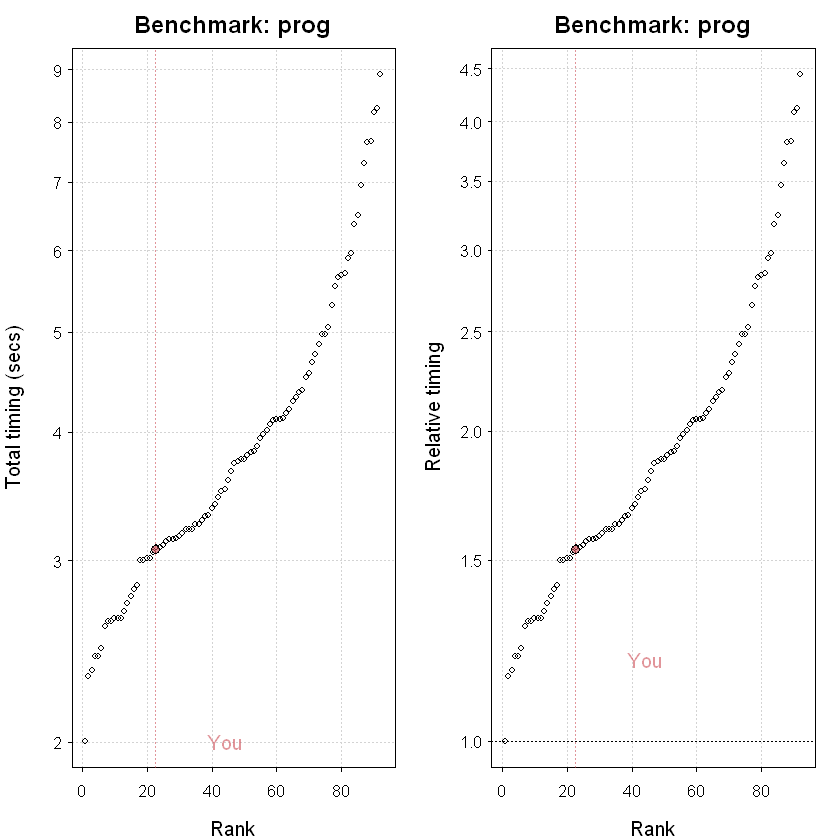

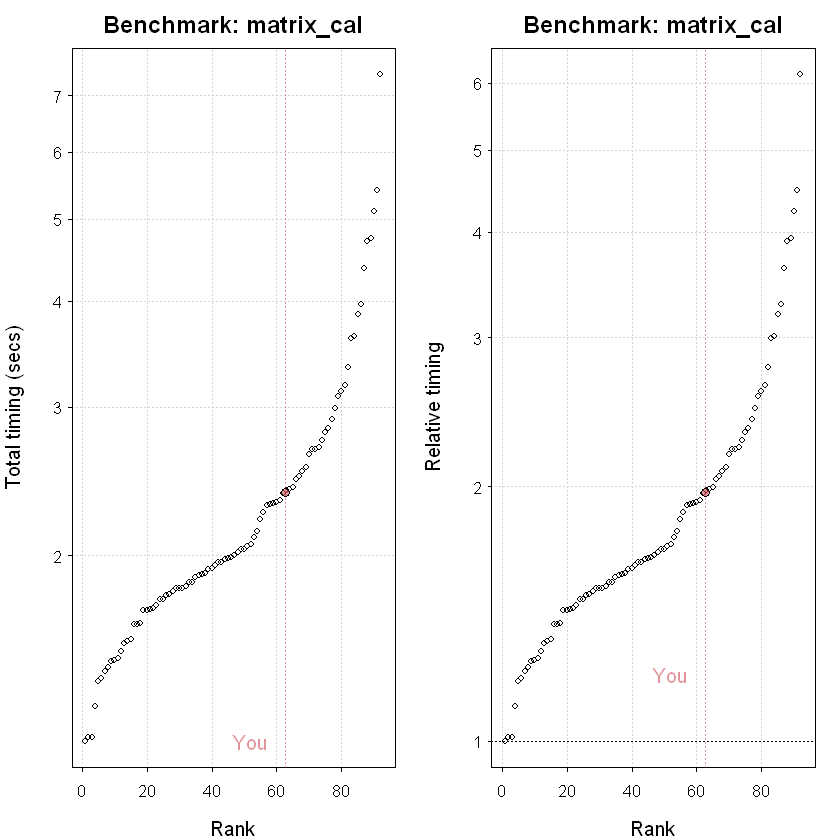

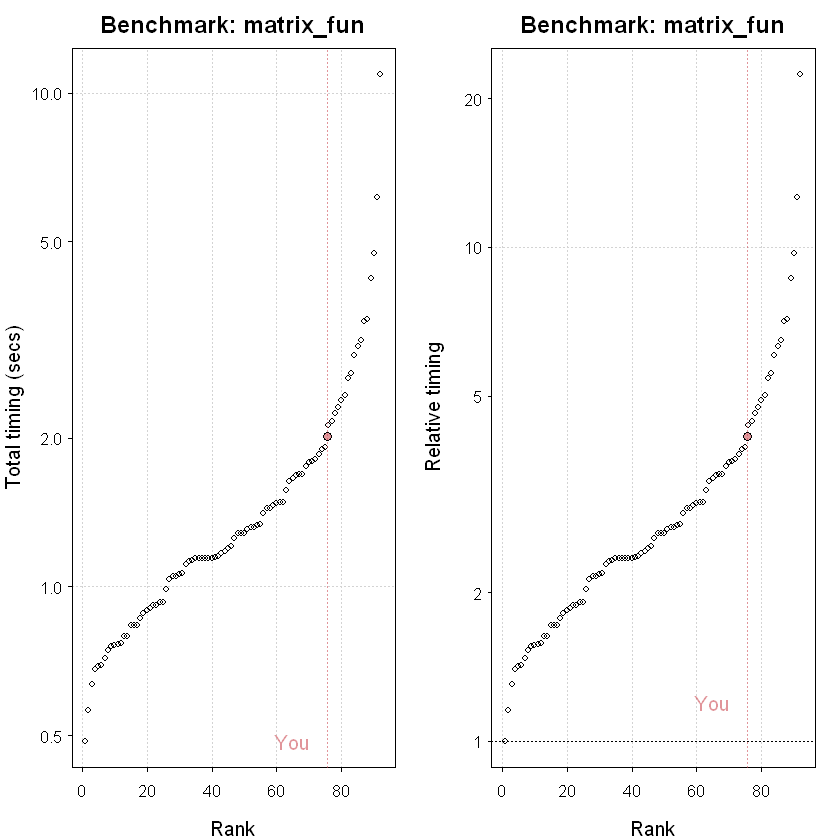

In [7]:
# After running the function, you plot the results to get two graphs.
# The first shows the absolute time it took to run the full function,
# and the second graph shows the relative time compared to other machines.
plot(results)

##### At the time of writing this

In the first loop, my machine ranked 16 out of 93 machines.  I could buy a new machine if I wanted to improve;  however, my relative time is less than 1.5 times as slow as the fastest.

In the third loop, my machine ranked 69 out of93 machines.  My relative time was close to 3 times slower than the fatest machine.  This provide more justification for getting a new machine than the first set of results

In [8]:
# Optionally, you can upload your results after running this function,
# to give this function a wider sample of machines.
upload_results(results)

Creating temporary file
Getting system specs. This can take a while on Macs
Uploading results
Upload complete
Tracking id: 2020-07-03-89790108


[1] "2020-07-03-89790108"

Preparing read/write io
# IO benchmarks (2 tests) for size 50 MB:
	 Writing a csv with 6250000 values: 13.2 (sec).
	 Reading a csv with 6250000 values: 2.51 (sec).
You are ranked 54 out of 119 machines.


Press return to get next plot 


You are ranked 42 out of 119 machines.


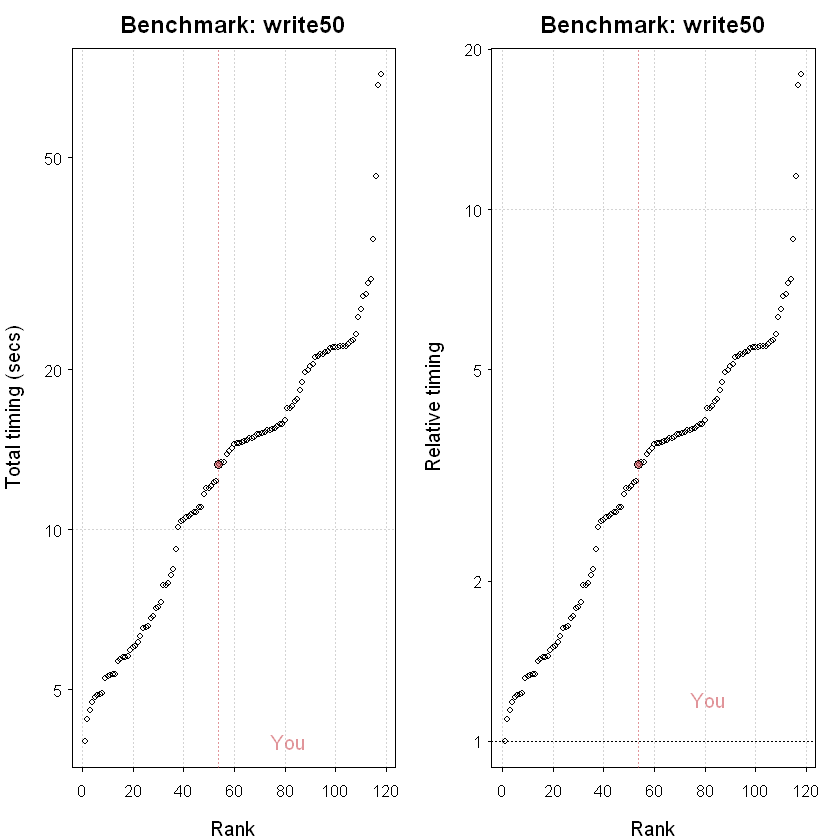

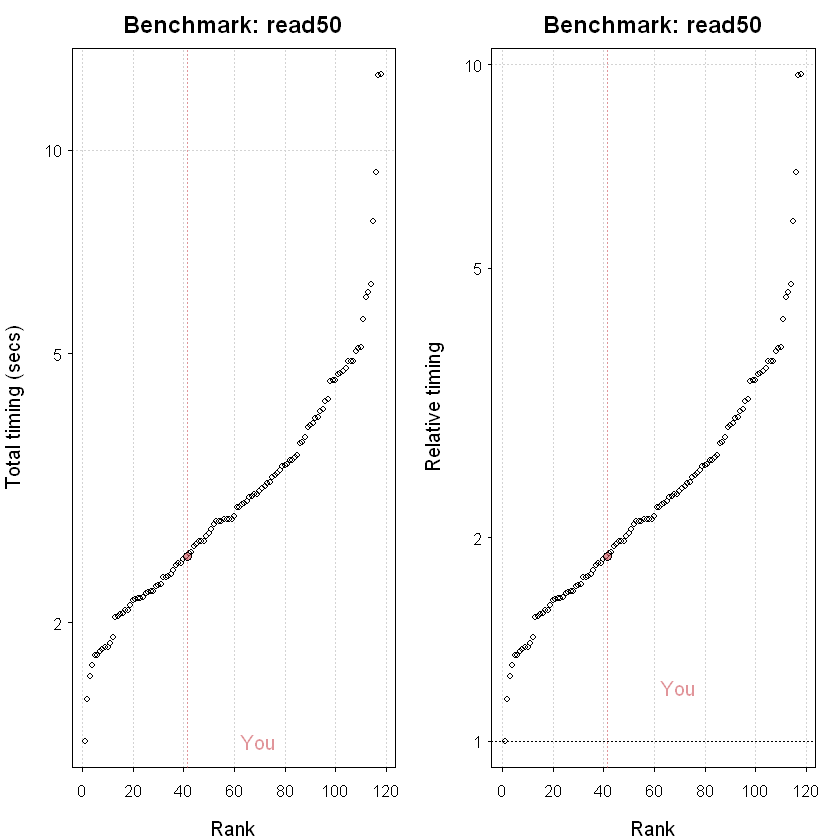

In [9]:
# Another useful function in the benchmarkme package is benchmark_io,
# which calculates the time it takes to read and write a file of size X MB.
results_io <- benchmark_io(runs=1, size=50)
plot(results_io)

# Memory Allocation
When you assign a variable in R, R must allocate memory in RAM, which takes time.  The R programming language does this automatically.  Therefore, to make our code run more quickly, we can minimize the amount of memory-allocation R has to perform.

In [10]:
# For example, suppose we want to form a sequence of numbers.
n <- 1e5

# We could do this using the color operator: 1:n
system.time(1:n)

   user  system elapsed 
      0       0       0 

In [11]:
# Alternatively, we could use a for-loop
# Note that we are defining a variable vector, and explicitly specifying it's length.
# The length of our pre-defined vector does not change; only the variables in the vector do.
# Consequently, we define a vector one time, and wait on R to allocate memory one time.
x <- vector("numeric", n) # define vector of length n
system.time(for (i in 1:n) {
  x[i] <- i
})

   user  system elapsed 
      0       0       0 

In [13]:
# Lastly, we could use a third method similar to the second,
# wherein we start with an empty object, and add new elements on each loop.

# The critical difference from the second method,
# is that we are not changing the current element on each loop; we are adding the element.
# This means that we start with a vector of length n.
# Then on the first loop, we have a vector of length n+1; on the second loop the length is n+2, etc.

# Consequently, we must reallocate memory in RAM each time we change the length of our vector.
y <- NULL
system.time(for (i in 1:n) {
  y <- c(y,i)
})

# The important lesson to learn- for efficiency, never grow a vector.

   user  system elapsed 
   7.06    0.00    7.06 

##### The important lesson to learn- for efficiency, never grow a vector.